#### Contents

##### 01 Import libraries and data
##### 02 Train algorithm
##### 03 Scale data
##### 04 Run the ANN
##### 05 Run other versions of the ANN

#### 01 Import libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import osa
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [4]:
path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets'

In [6]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [8]:
df_2 = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [10]:
df.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max','ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean','TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1, inplace=True)

#### 02 Train algorithm

In [14]:
X = df.drop(['DATE','MONTH'], axis=1)
y = df_2.drop(['DATE'], axis=1)

In [16]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [18]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [22]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,13.6,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,-3.2,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,-6.0,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,-3.8,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,1.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,10.6,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,-0.5,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,-7.4,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,11.2,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,9.9,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


#### 03 Scale data

In [24]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [26]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

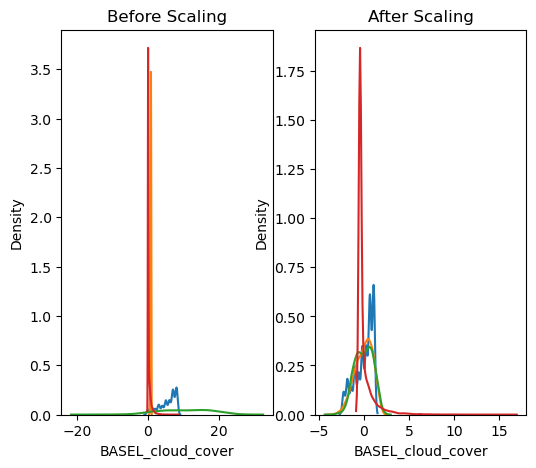

In [36]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['BASEL_humidity'], ax=ax1)
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BASEL_precipitation'], ax=ax1) 

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_humidity'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BASEL_precipitation'], ax=ax2)

plt.show()

##### Analysis

I believe scaling will make less of a difference in this situation. The four examined variables don't converge as closely as they do in the example.

#### 04 Run the ANN

In [28]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [30]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.47681849872182197
0.48117811084001394


In [32]:
# set up confusion matrices

locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


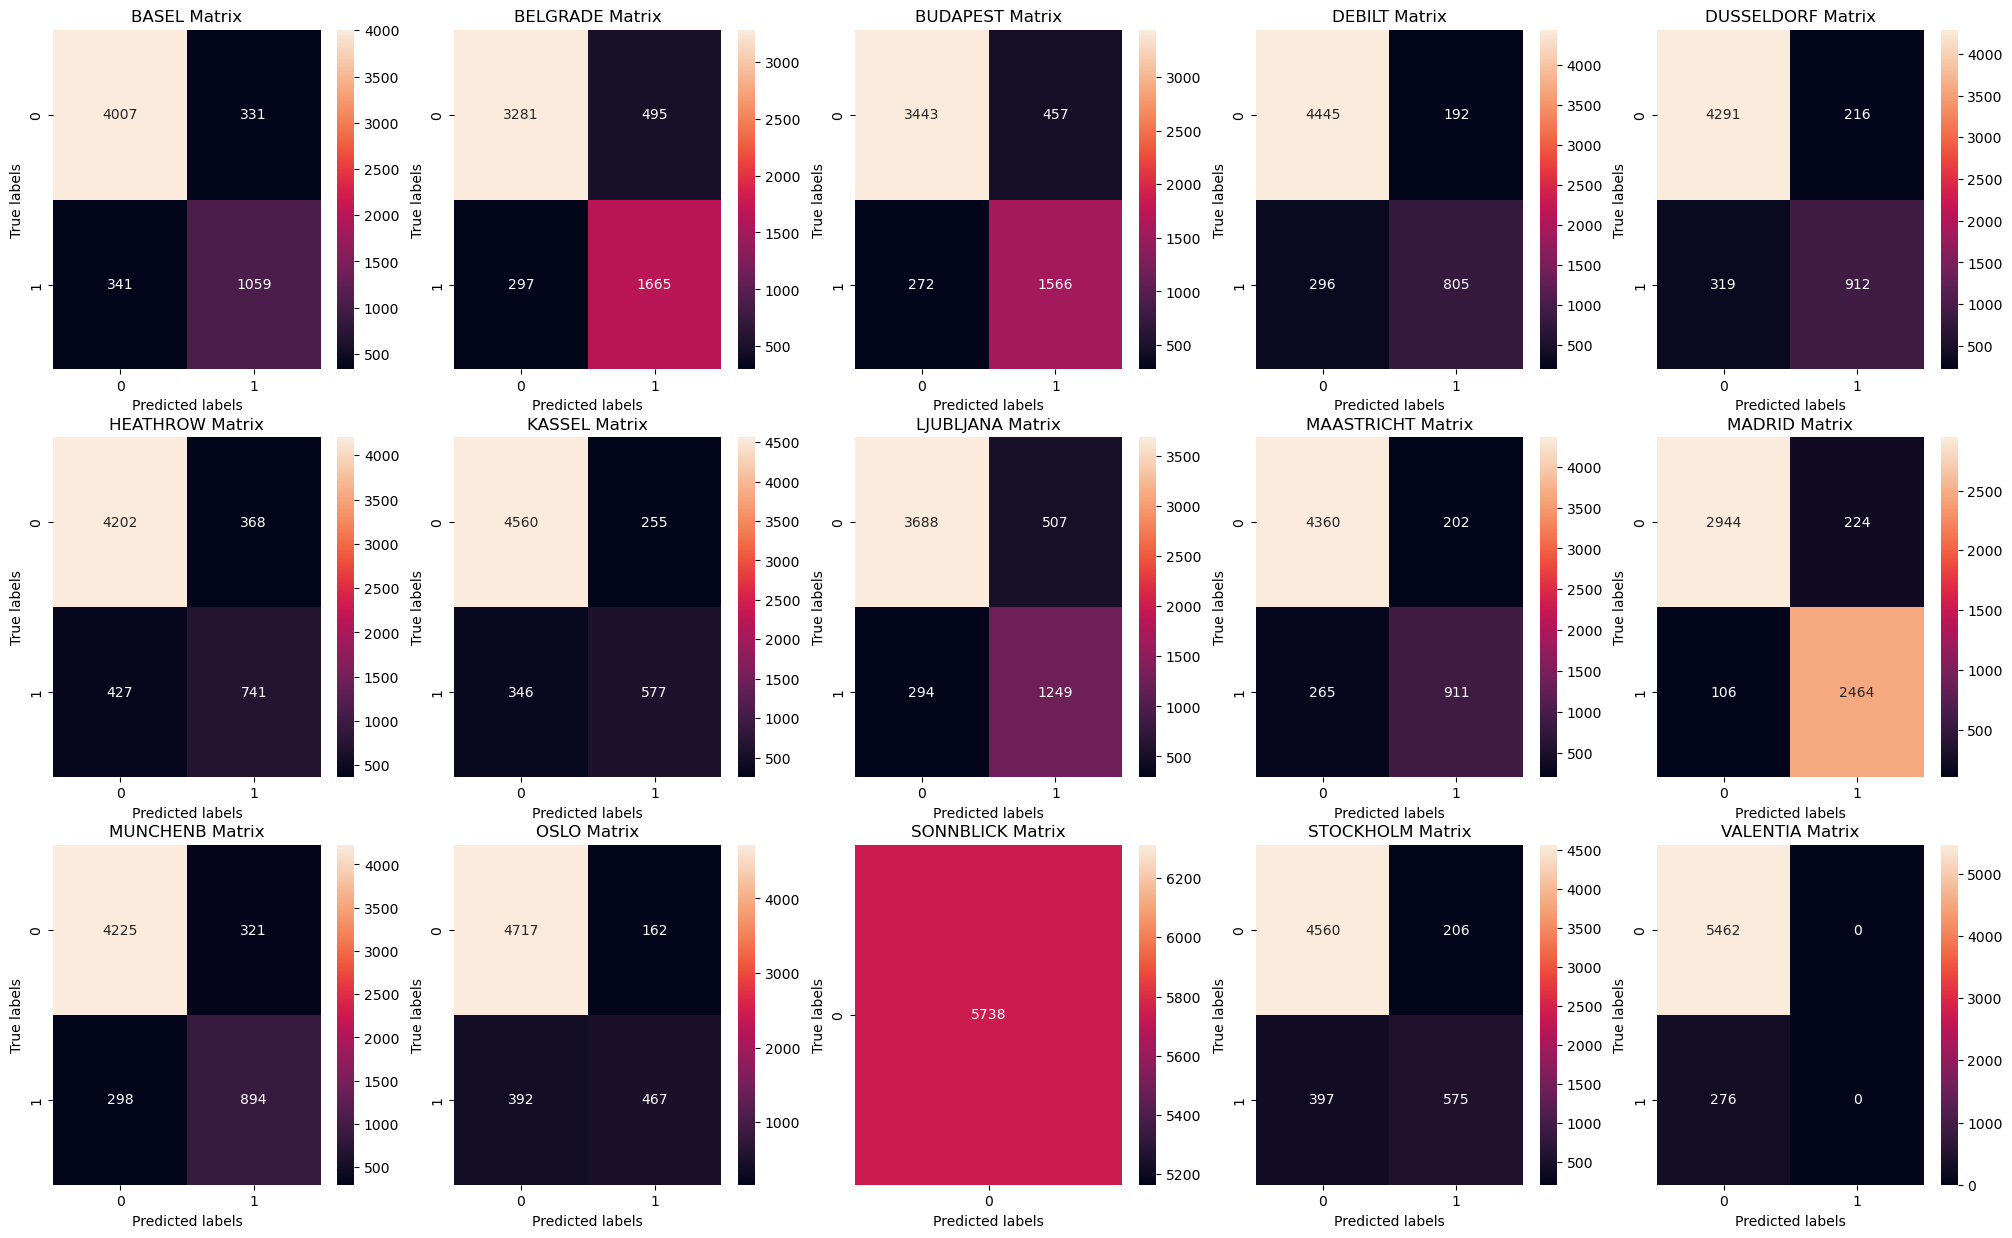

In [34]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### 05 Run other versions of the ANN

In [41]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 50, 75), max_iter=250, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 50, 75), max_iter=250, tol=1e-05)

In [43]:
#This version did not converge at 250 iterations. The other one did at 500. I predict accuracy will be lower despite more hidden layers.\
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5227748082732977
0.5097594980829557


In [45]:
#Accuracy is slightly higher. Let's set up another ANN with more iterations and even more hidden layers.
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(20,40,60), max_iter=500, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 40, 60), max_iter=500, tol=1e-05)

In [47]:
#This one converged. Let's check accuracy.
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5942365791308389
0.563785291042175


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


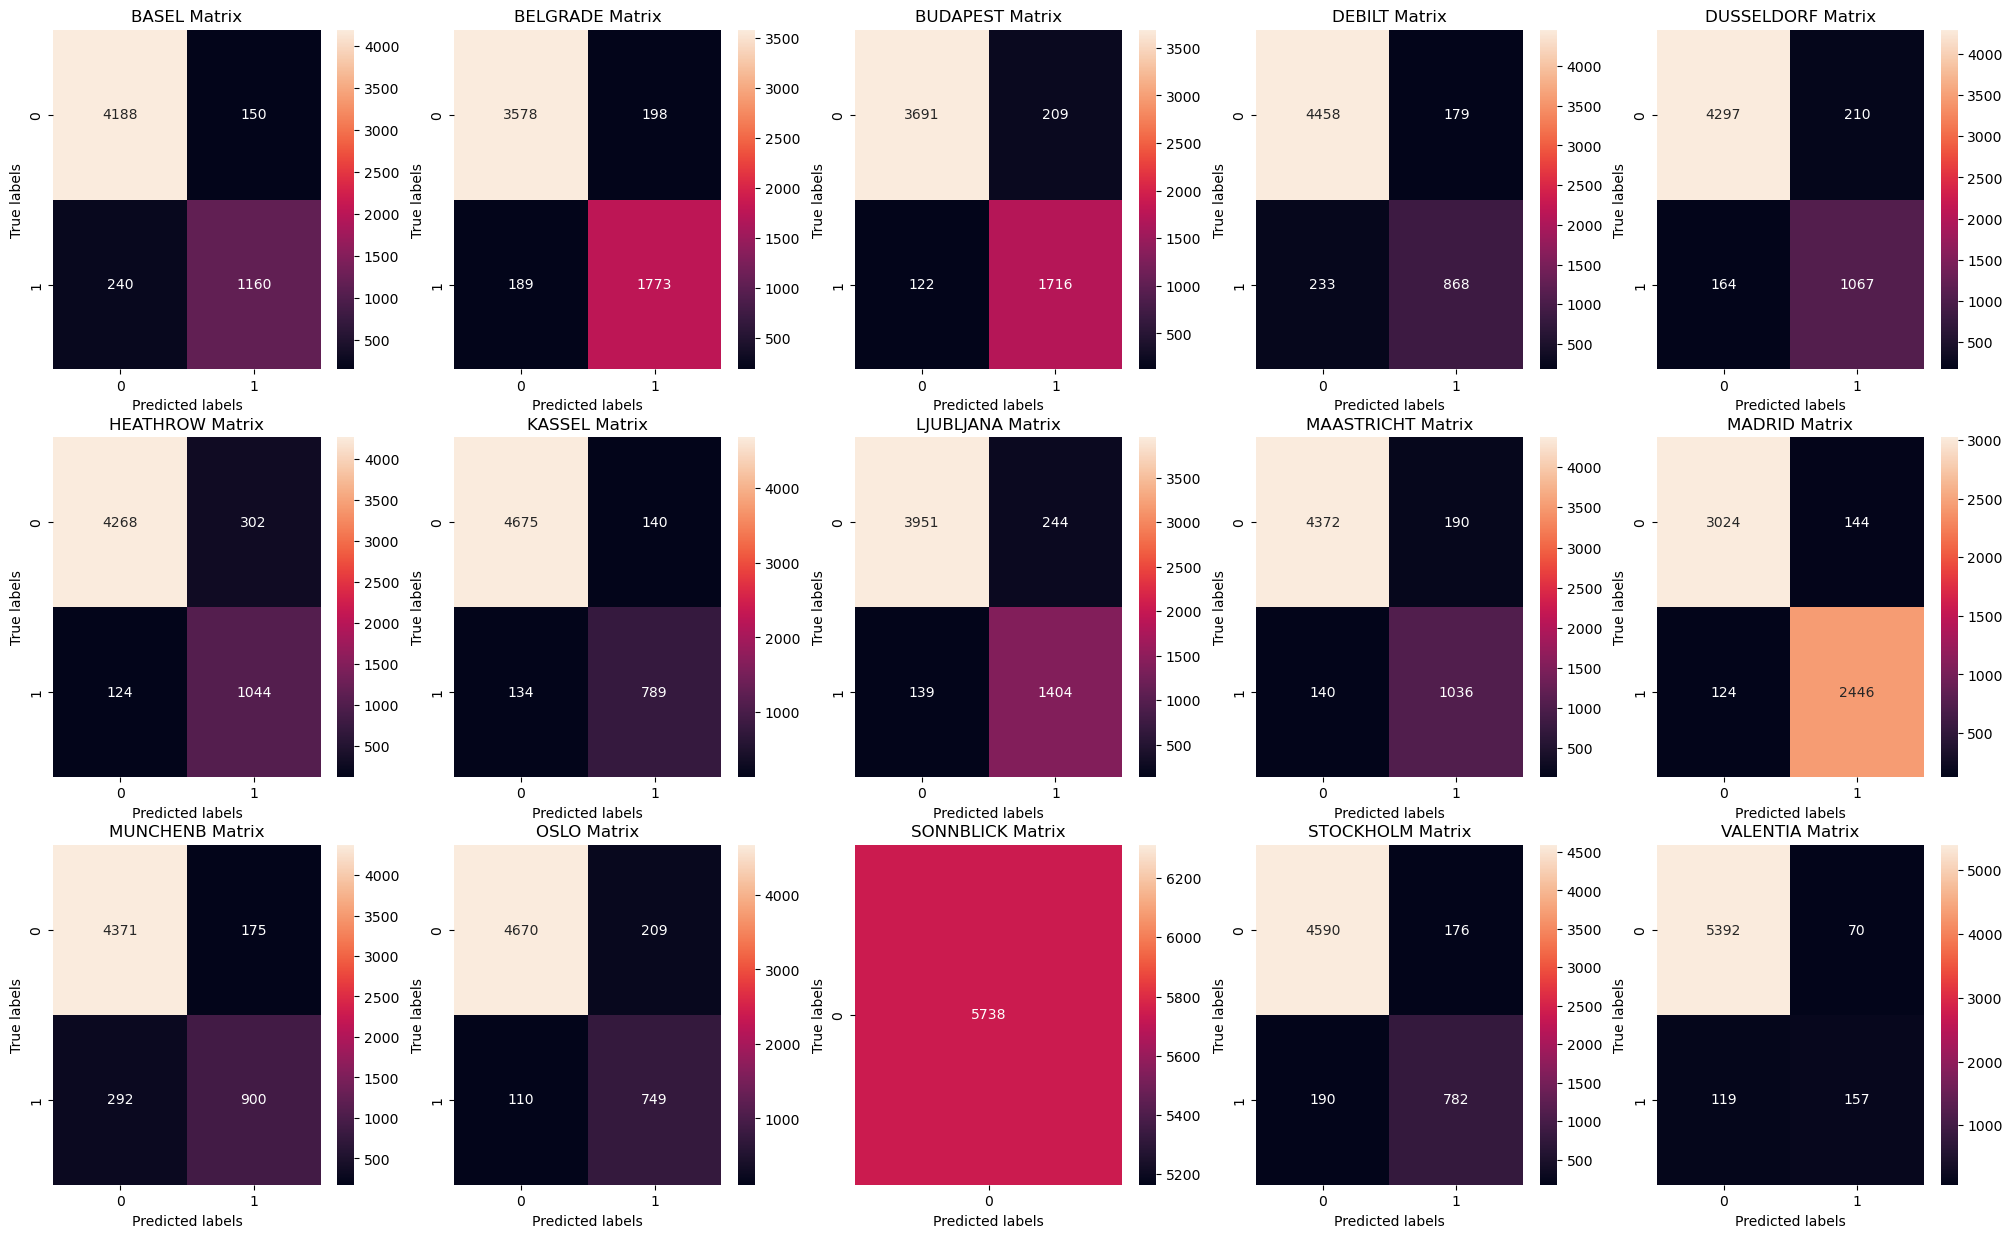

In [49]:
#Print confusion matrix before trying more hidden layers.
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [51]:
#Confusion matrices are only slightly better for this iteration. Let's try another.
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(40,80,120), max_iter=500, tol=0.000001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 80, 120), max_iter=500, tol=1e-06)

In [53]:
#This one converged. Let's check accuracy.
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6681966070183593
0.5494945974207041


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


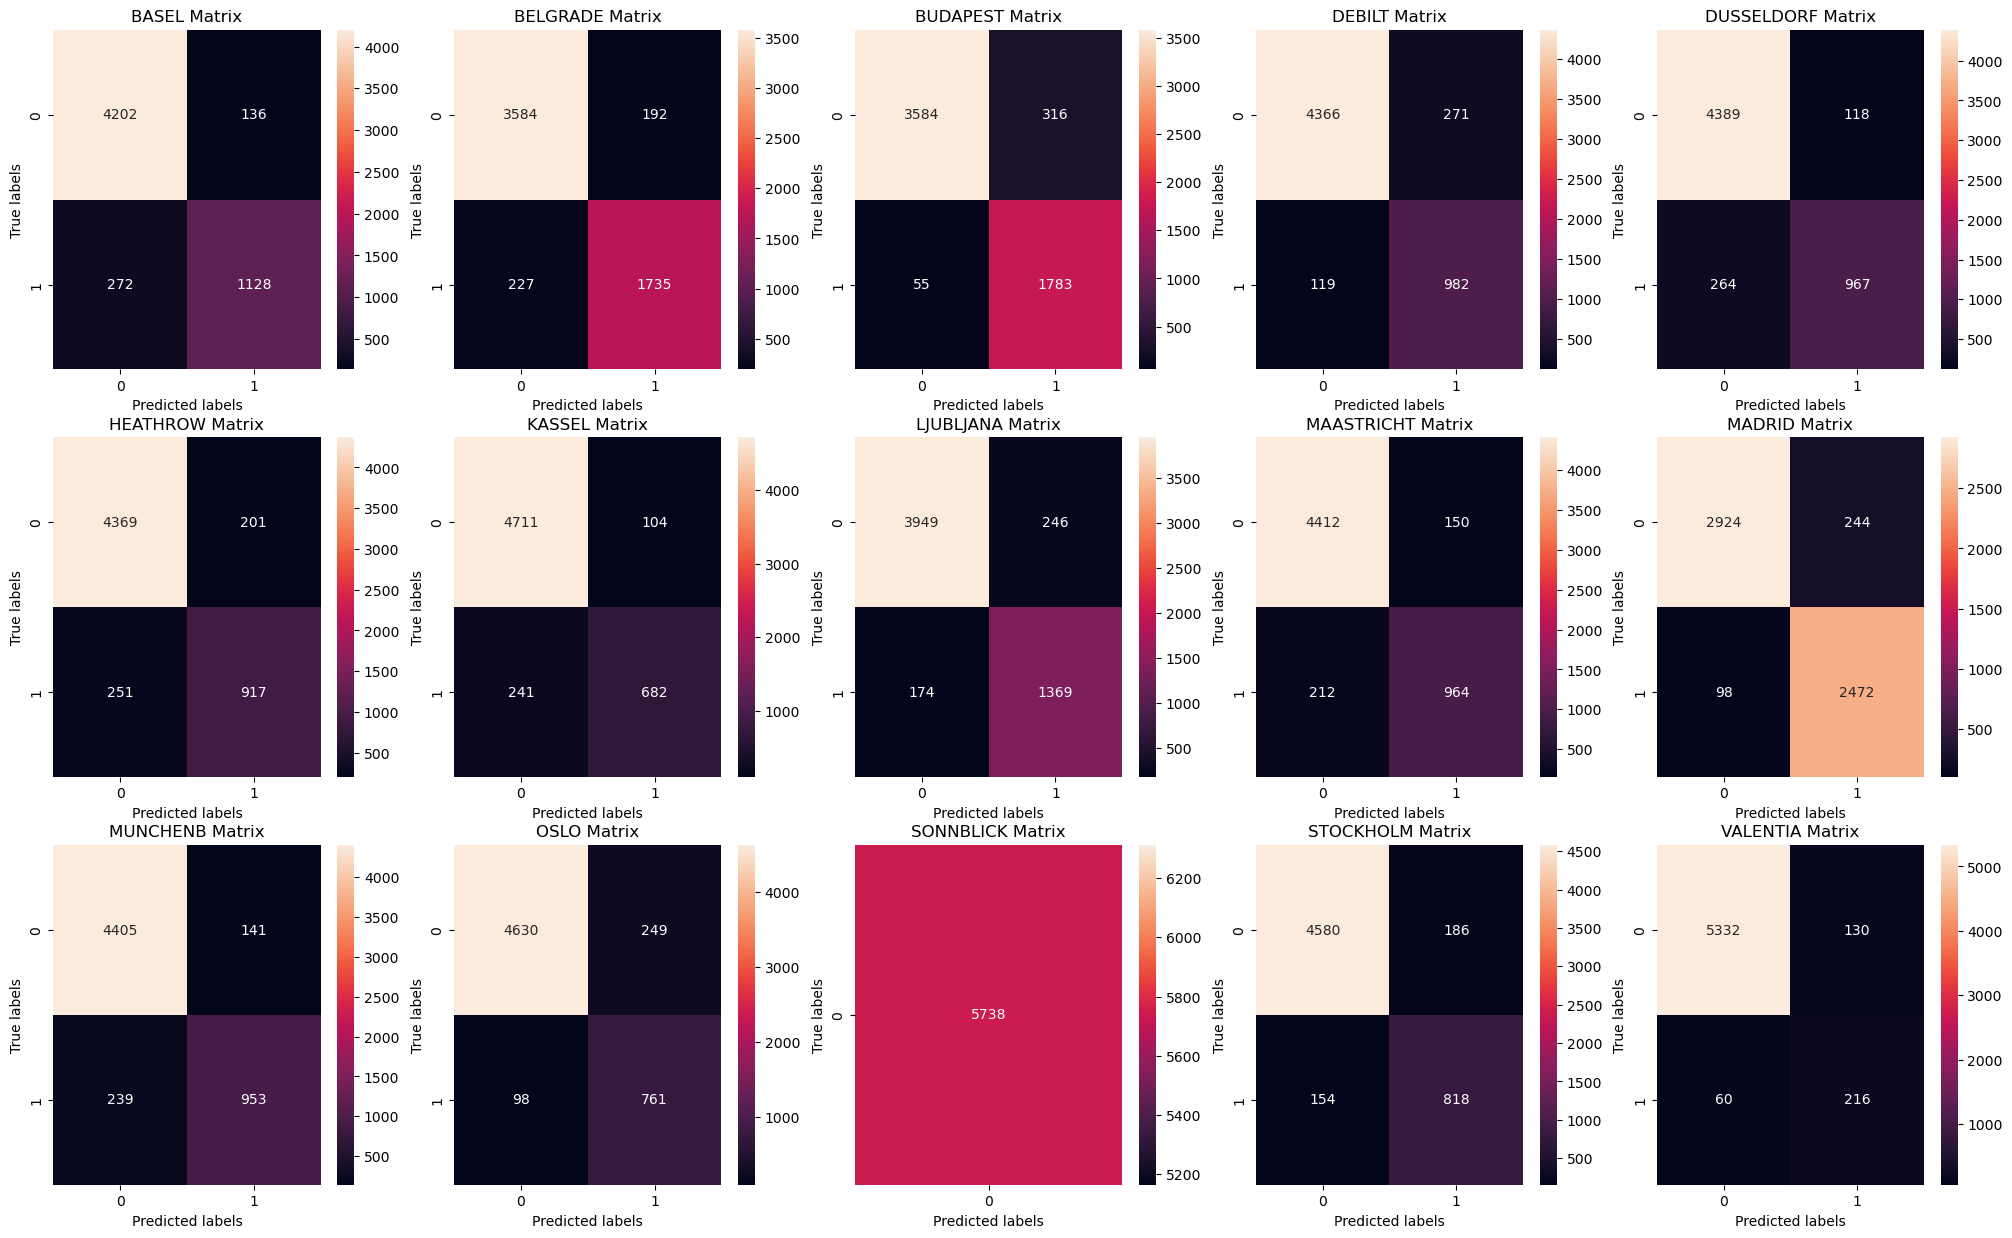

In [55]:
#Hmm. Training accuracy improved significantly but testing accuracy slightly dropped. Let's stop here and run a confusion matrix.
#Print confusion matrix before trying more hidden layers.
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1